### 1. 创建测试数据

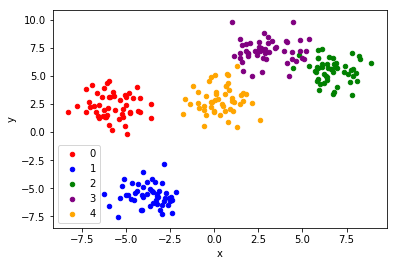

In [1]:
import pandas as pd
from matplotlib import pyplot
from sklearn.datasets.samples_generator import make_blobs

% matplotlib inline

# generate 2d classification dataset
X, y = make_blobs(n_samples=250, centers=5, n_features=2)

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:"green", 3:"purple", 4:"orange"}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

### 2. sklearn agnes

### 3. AGNES

In [8]:
import numpy as np

class AGNES(object):
    def __init__(self, class_num, measure = "davg"):
        """ 初始化 agnes  模型参数
        """
        self._class_num = class_num 
        self._measure = measure
        
        # 训练后得到的聚类学习结果
        self._labels = None
        self._dist_matrix = None
    
    
    def _d_avg(self, label_1, label_2):
        """ 计算 label_1 和 labels 的类簇距离
        """
        # label_1 样本
        label_1_X = self._labels.get(label_1)
        
        # label_2 样本
        label_2_X = self._labels.get(label_2)
        
        # 返回这两个类簇的距离
        return np.mean([ self._dist_matrix[i, j] for i in label_1_X for j in label_2_X])
        
    
    def fit(self, X):
        """ 训练样本
        
        arguments:
        ----------
        X: numpy, shape=(n_samples, n_features)
        """
        
        # step0: 获取训练样本大小
        n_samples, n_features = X.shape
        
        # step1: 初始化每个样本点为一个聚类
        self._labels = { i:[i] for i in range(n_samples)}
                
        # step2: 计算每个聚类之间的样本点的距离
        self._dist_matrix = np.zeros((n_samples, n_samples))
        for inx, vec in enumerate(X):
            self._dist_matrix[inx] = np.sqrt(np.sum((vec - X) * (vec - X), axis = 1))        

        # step3: 遍历，从下到上聚合类
        while self._class_num < len(self._labels.keys()):
            labels_keys = list(self._labels.keys())
            current_class_num = len(self._labels.keys())
            
            # step 3.1 找出最近的两个类
            current_class_dist = np.ones((current_class_num, current_class_num)) * np.inf
            for inx_1, item_1 in enumerate(labels_keys):
                for inx_2, item_2 in enumerate(labels_keys):
                    if inx_1 == inx_2:
                        continue
                    current_class_dist[inx_1, inx_2] = self._d_avg(item_1, item_2)
            inx_1, inx_2 = np.unravel_index(np.argmin(current_class_dist, axis=None), current_class_dist.shape)
            item_1 = labels_keys[inx_1]
            item_2 = labels_keys[inx_2]
            # step 3.2 合并这两个类
            self._labels[item_1].extend(self._labels[item_2])
            del self._labels[item_2]

### 3. 三类效果

In [9]:
agnes = AGNES(class_num= 3)
agnes.fit(X)

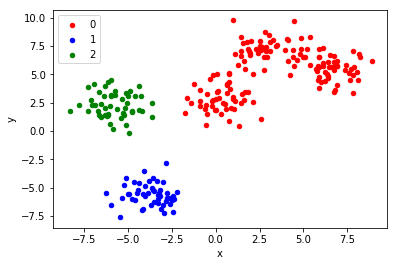

In [14]:
import pandas as pd
from matplotlib import pyplot
from sklearn.datasets.samples_generator import make_blobs

% matplotlib inline

X_new = np.copy(X)
y_new = np.copy(y)

inx = 0
for key, value in agnes._labels.items():
    y_new[value] = inx
    inx += 1

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X_new[:,0], y=X_new[:,1], label=y_new))
colors = {0:'red', 1:'blue', 2:"green", 3:"purple", 4:"orange"}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
pyplot.show()

### 4. 五类效果

In [15]:
agnes = AGNES(class_num= 5)
agnes.fit(X)

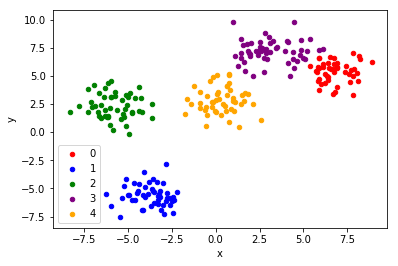

In [16]:
import pandas as pd
from matplotlib import pyplot
from sklearn.datasets.samples_generator import make_blobs

% matplotlib inline

X_new = np.copy(X)
y_new = np.copy(y)

inx = 0
for key, value in agnes._labels.items():
    y_new[value] = inx
    inx += 1

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X_new[:,0], y=X_new[:,1], label=y_new))
colors = {0:'red', 1:'blue', 2:"green", 3:"purple", 4:"orange"}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
pyplot.show()